# School Census Analysis

The data is a 500-record dataset from the American Statistical Association's survey, U.S. Census at School (link: https://ww2.amstat.org/censusatschool/ Excel format: http://bit.ly/2VuOA98)

No explanations of field names provided. Some answers may not be valid data as the survey is self-completed.

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn'

In [27]:
sdf=pd.read_excel("http://bit.ly/2VuOA98")

The following cells investigate whether or not a correlation exists between age and hours of sleep on school nights. It uses two specific columns from the ASA survey, excluding any answers which aren't numerical.

In [28]:
sdf_sleep = sdf[['Ageyears', 'Sleep_Hours_Schoolnight']]
sdf_sleep.columns = ['Age', 'Sleep_SN']
sdf_sleep.Sleep_SN = pd.to_numeric(sdf_sleep.Sleep_SN, errors='coerce')
sdf_sleep=sdf_sleep.dropna()

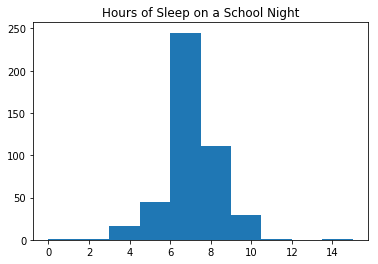

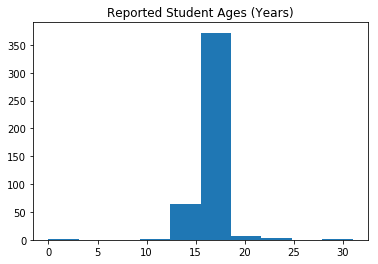

In [29]:
plt.hist(sdf_sleep.Sleep_SN)
plt.title('Hours of Sleep on a School Night')
plt.show()

plt.hist(sdf_sleep.Age)
plt.title('Reported Student Ages (Years)')
plt.show()

Given the outliers in age and sleep shown by the above histograms, I'll assume that anyone with over 11 or under 2 hours of sleep per school night is lying, as is any student who reports being less than 10 or greater than 24 years old. Note this assumption might be incorrect.

In [30]:
sdf_sleep = sdf_sleep[sdf_sleep.Age<=24]
sdf_sleep = sdf_sleep[sdf_sleep.Age>=10]
sdf_sleep = sdf_sleep[sdf_sleep.Sleep_SN<=11]
sdf_sleep = sdf_sleep[sdf_sleep.Sleep_SN>=2]

In [31]:
sdf_sleep.corr()

,Age,Sleep_SN
Age,1.000000,-0.078336
Sleep_SN,-0.078336,1.000000


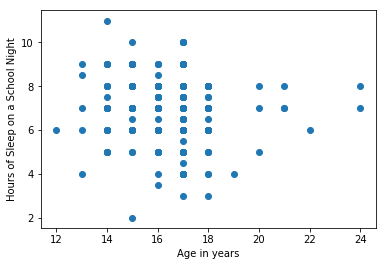

In [32]:
plt.scatter(sdf_sleep.Age, sdf_sleep.Sleep_SN)
plt.xlabel('Age in years')
plt.ylabel('Hours of Sleep on a School Night')
plt.show()

Even without the outliers, there is no significant correlation between the dat provided in these two columns, proven by the low value of the two compared mathematically to one another and shown visually in the scatter plot above,